In [146]:
import json
import re
from loguru import logger


def parse_log_file(log_file_path, pattern='sorted apys'):
    parsed_data = []
    # json_pattern = re.compile(r'sorted apys: ({.*})')
    json_pattern = re.compile(rf'{re.escape(pattern)}\s*({{.*}})')
    # json_pattern = re.compile(rf'{re.escape(pattern)}({{.*}})')

    def convert_to_valid_json(json_str):
        # Replace unquoted keys with quoted keys
        json_str = re.sub(r'(\d+):', r'"\1":', json_str)
        return json_str

    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            match = json_pattern.search(line)
            if match:
                json_str = match.group(1).strip()
                json_str = convert_to_valid_json(json_str)
                try:
                    json_data = json.loads(json_str)
                    parsed_data.append(json_data)
                except json.JSONDecodeError as e:
                    logger.error(f"Error parsing JSON: {e}")

    return parsed_data

# Example usage
log_file_path = '/Users/chau.hoang/Downloads/pleasant_bird_2.log'
parsed_json_list = parse_log_file(log_file_path, pattern='sorted axon times: ')
# parsed_json_list = parse_log_file(log_file_path, pattern='sorted apys: ')

264
Uid: 244 Mean time: 0.9684881017063603


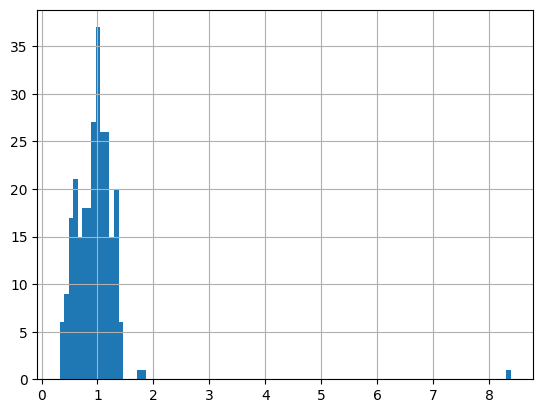

In [99]:
import pandas as pd
print(len(parsed_json_list))
# better = [p for p in parsed_json_list if p['156'] < p['83']]

# print(len(better) / len(parsed_json_list))

# small = [p for p in parsed_json_list if p['83'] < 1]

# len(small)

uid = '244'
data = [p[uid] for p in parsed_json_list]
df = pd.DataFrame({'time': data})
df['time'].hist(bins=100)
print(f'Uid: {uid} Mean time: {df["time"].mean()}')


In [147]:
# Sorting apy and average score according to the log
df = pd.DataFrame(parsed_json_list)
df['max_apy'] = df.max(axis=1)
columns_to_scale = ['161', '156', '203', '255', '101', '1', '100', '10']
# Calculate the ratio
ratio_df = df[columns_to_scale].div(df['max_apy'], axis=0)
ratio_df.mean()

161    0.137053
156    0.142841
203    0.118933
255    0.087433
101    0.272517
1      0.203520
100    0.150183
10     0.193689
dtype: float64

In [36]:
# Sorting apy and average score according to the log
df = pd.DataFrame(parsed_json_list)
df['max_apy'] = df.max(axis=1)
columns_to_scale = ['161', '156', '203', '255', '101', '1', '100', '10']
# Calculate the ratio
ratio_df = df[columns_to_scale].div(df['max_apy'], axis=0)
ratio_df.mean()

161    0.980817
156    0.980817
203    0.980817
255    0.980817
101    0.982004
1      0.988716
100    0.988716
10     0.988716
dtype: float64

In [44]:

df = pd.DataFrame(parsed_json_list)
print(df.iloc[263]['244'])
ss = df.iloc[263]
print(ss.sort_values(ascending=False))
ss.sort_values()[ss > 15].hist(bins=200)
# df.iloc[263].sort_values().hist(bins=200)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 df = pd.DataFrame(parsed_json_list)                                                          │
│   2 print(df.iloc[263]['244'])                                                                   │
│   3 ss = df.iloc[263]                                                                            │
│   4 print(ss.sort_values(ascending=False))                                                       │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'parsed_json_list' is not defined

In [53]:
import json

def convert_to_valid_json(json_str):
    # Replace unquoted keys with quoted keys
    json_str = re.sub(r'(\d+):', r"'\1':", json_str)
    return json_str


In [56]:
import re, json

with open('sample_pools_and_miner_answers.json', 'r') as f:
    data = json.load(f)

alloc = data['answers']
print(alloc['136'])
print(alloc['212'])
print(alloc['169'])
print(alloc['201'])

{'apy': 20.61983099229947, 'allocations': {'0': 0.10662337287158104, '1': 0.2533625774098979, '2': 0.23525900403185127, '3': 0.18401755315927146, '4': 0.36044025423796827, '5': 0.24496563561435203, '6': 0.05040238333764486, '7': 0.1222333211330441, '8': 0.3216033590983884, '9': 0.12109253910400115}}
{'apy': 20.61983099229947, 'allocations': {'0': 0.10662337287158104, '1': 0.2533625774098979, '2': 0.23525900403185127, '3': 0.18401755315927146, '4': 0.36044025423796827, '5': 0.24496563561435203, '6': 0.05040238333764486, '7': 0.1222333211330441, '8': 0.3216033590983884, '9': 0.12109253910400115}}
{'apy': 19.91857056197781, 'allocations': {'0': 0.0411, '1': 0.2705, '2': 0.2805, '3': 0.1969, '4': 0.3916, '5': 0.2522, '6': 0.0001, '7': 0.0614, '8': 0.3536, '9': 0.1515}}
{'apy': 19.91857056197781, 'allocations': {'0': 0.0411, '1': 0.2705, '2': 0.2805, '3': 0.1969, '4': 0.3916, '5': 0.2522, '6': 0.0001, '7': 0.0614, '8': 0.3536, '9': 0.1515}}


In [142]:
import pandas as pd
import numpy as np
from sturdy.score import get_agg_apy
from sturdy.utils.misc import supply_rate

def calc_apy(pools, allocations):
    curr_yield = 0
    for uid, pool_data in pools.items():
        # print(f'uid: {uid}, pool_data: {pool_data}')
        util_rate = pool_data["borrow_amount"] / (pool_data["reserve_size"] + allocations[uid])
        # util_rate = allocations[uid] / (pool_data['reserve_size'] + allocations[uid])
        pool_yield = allocations[uid] * supply_rate(
            util_rate, pools[uid]
        )
        # print(f'uid {uid}, reserve: {pool_data["reserve_size"]} allocation: {allocations[uid]} util_rate: {util_rate} yield {pool_yield}')
        curr_yield += pool_yield
    return curr_yield

with open('sample_pools_and_miner_answers.json', 'r') as f:
    data = json.load(f)

pools = data['pools']

print('136', calc_apy(pools, alloc['136']['allocations']))
print('169', calc_apy(pools, alloc['169']['allocations']))

scores = []
for i in range(1000):
    scores.append({
        '136': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['136']['allocations']),
        '169': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['169']['allocations'])
    })
df = pd.DataFrame(scores)
df['win'] = df.idxmax(axis=1)
df['win'].value_counts()

136 0.10617200299035105
169 0.1138654327635179


win
136    543
169    457
Name: count, dtype: int64

In [138]:
from sturdy.score import run_simulation

with open('sample_pools_and_miner_answers.json', 'r') as f:
    data = json.load(f)

pools = data['pools']

uid = '169'

simulators = {
    '136': run_simulation({'total_assets': 2.0, 'pools': pools}, alloc['136']['allocations']),
    '169': run_simulation({'total_assets': 2.0, 'pools': pools}, alloc['169']['allocations']),
    'new': run_simulation({'total_assets': 2.0, 'pools': pools}, {pool_id: 0.1 for pool_id in pools.keys()})
}


In [144]:
# pools
import copy

uid = 'new'
allocs = {pool_id: 0.1 for pool_id in pools.keys()}

borrow_amounts = [{
    pool_id: pool[pool_id]['borrow_amount']
        for pool_id in allocs.keys()
    }
    for pool in simulators[uid].pool_history
]

df = pd.DataFrame(borrow_amounts)
df.mean()
new_pools = copy.deepcopy(pools)
for pool in new_pools.values():
    pool['borrow_amount'] = df[pool['pool_id']].mean()

In [182]:
%load_ext autoreload
%autoreload 2
from sturdy.protocol import AllocateAssets
from sturdy.utils.yiop import yiop_allocation_algorithm


def calc_apy(pools, allocations):
    curr_yield = 0
    for uid, pool_data in pools.items():
        # print(f'uid: {uid}, pool_data: {pool_data}')
        util_rate = pool_data["borrow_amount"] / (pool_data["reserve_size"] + allocations[uid])
        # util_rate = allocations[uid] / (pool_data['reserve_size'] + allocations[uid])
        pool_yield = allocations[uid] * supply_rate(
            util_rate, pools[uid]
        )
        # print(f'uid {uid}, reserve: {pool_data["reserve_size"]} allocation: {allocations[uid]} util_rate: {util_rate} yield {pool_yield}')
        curr_yield += pool_yield
    return curr_yield


allocation = yiop_allocation_algorithm(AllocateAssets(assets_and_pools={'total_assets': 2.0, 'pools': new_pools}))

print('136', calc_apy(pools, alloc['136']['allocations']))
print('169', calc_apy(pools, alloc['169']['allocations']))

scores = []
for i in range(1000):
    scores.append({
        '136': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['136']['allocations']),
        '169': get_agg_apy({'total_assets': 2.0, 'pools': pools}, alloc['169']['allocations']),
        'new': get_agg_apy({'total_assets': 2.0, 'pools': pools}, allocation)
    })
df = pd.DataFrame(scores)
df['win'] = df.idxmax(axis=1)
df['win'].value_counts()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
136 0.10617200299035105
169 0.1138654327635179


win
136    1000
Name: count, dtype: int64

In [167]:
# What if we know pool_history in simulator ahead of time?



{'0': {'pool_id': '0',
  'base_rate': 0.02,
  'base_slope': 0.036,
  'kink_slope': 0.388,
  'optimal_util_rate': 0.65,
  'borrow_amount': 0.7,
  'reserve_size': 1.0},
 '1': {'pool_id': '1',
  'base_rate': 0.02,
  'base_slope': 0.09,
  'kink_slope': 0.639,
  'optimal_util_rate': 0.65,
  'borrow_amount': 0.7,
  'reserve_size': 1.0},
 '2': {'pool_id': '2',
  'base_rate': 0.04,
  'base_slope': 0.061,
  'kink_slope': 0.765,
  'optimal_util_rate': 0.65,
  'borrow_amount': 0.7,
  'reserve_size': 1.0},
 '3': {'pool_id': '3',
  'base_rate': 0.02,
  'base_slope': 0.059,
  'kink_slope': 0.711,
  'optimal_util_rate': 0.7,
  'borrow_amount': 0.75,
  'reserve_size': 1.0},
 '4': {'pool_id': '4',
  'base_rate': 0.03,
  'base_slope': 0.093,
  'kink_slope': 0.937,
  'optimal_util_rate': 0.9,
  'borrow_amount': 0.9,
  'reserve_size': 1.0},
 '5': {'pool_id': '5',
  'base_rate': 0.01,
  'base_slope': 0.099,
  'kink_slope': 0.297,
  'optimal_util_rate': 0.65,
  'borrow_amount': 0.7,
  'reserve_size': 1.0},


In [166]:
parsed_json_list = parse_log_file(log_file_path, pattern='sorted apys: ')
df = pd.DataFrame(parsed_json_list)

df.iloc[-1][76] # 19.908930204134524
df.iloc[-1][228] # 19.412394419579094

len([i for i in df.iloc[-1] if i == df.iloc[-1][228]])

/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_44625/2978696010.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[-1][76] # 19.908930204134524
/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_44625/2978696010.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[-1][228] # 19.412394419579094
/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_44625/2978696010.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

59